In [0]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score




In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# cd drive/My\ Drive/301Final

In [0]:
# cp df.csv dfcp.csv

In [0]:
# mv dfcp.csv ../../../

In [0]:
# cd ../../../

In [0]:
df = pd.read_csv("dfcp.csv")

In [0]:
# sample with regression first 
df.head()


,Unnamed: 0,offender_number,fiscal_year_released,supervision_status,institution_name,sex,race_ethnicity,age_at_release,offense_class,offense_description,offense_type,offense_subtype,jurisdiction,admission_date,months_served,institution_type,Exit,release_month,age_at_admission,time served
0,0,1000998,2015,Prison,Anamosa State Penitentiary,Male,White,56,B Felony,MURDER 2ND - 85%,Violent,Murder/Manslaughter,Montgomery,1997-11-25T00:00:00.000,202.96,Maximum,Death,October,39,1.701144
1,1,100134,2012,Prison,Mount Pleasant Correctional Facility,Male,White,47,D Felony,THEFT 2ND DEGREE,Property,Theft,Johnson,2011-01-18T00:00:00.000,8.49,Minimum,Parol,October,46,1.238485
2,2,10044,2013,Prison,Mount Pleasant Correctional Facility,Male,White,52,D Felony,Possession of a Controlled Substance - 3rd and...,Drug,Drug Possession,Henry,2012-02-06T00:00:00.000,7.50,Minimum,Working,September,51,1.223224
3,3,100446,2010,Prison,Mount Pleasant Correctional Facility,Female,White,44,Aggravated Misdemeanor,OPER VEH WH INT (OWI) / AGR MISD / 2ND OFF -,Public Order,OWI,Polk,2009-06-24T00:00:00.000,9.47,Minimum,End of Sentence,April,43,1.252088
4,4,100467,2016,Prison,Anamosa State Penitentiary,Male,White,51,D Felony,Possession of a Controlled Substance - 3rd and...,Drug,Drug Possession,Polk,2015-06-12T00:00:00.000,12.30,Maximum,Parol,June,50,1.285259


In [0]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


In [0]:
# single predictor regression models 


simple_reg_models = {"Predictor":[],
                     "RMSE":[],
                     "Model":[]}

X_cat = ['offense_type', 'sex', 'institution_name', 'offense_type', 
          'offense_subtype', 'jurisdiction']#, 'release_month']
X_quant = ['age_at_admission']

y_train = df['time served'].copy()


def make_cat_model(x, y_train):


  X_train = df[[x]]

  ct = make_column_transformer(
      (OneHotEncoder(handle_unknown="ignore"), [x]),
      remainder="passthrough"
  )
  pipeline = make_pipeline(
      ct,
      LinearRegression()
  )

  pipeline.fit(X_train, y_train)
  rmse = (-cross_val_score(pipeline,
                          X=X_train,
                          y=y_train,
                          cv=10,
                          scoring="neg_mean_squared_error"
  ).mean())**.5


  simple_reg_models['Predictor'].append(x)
  simple_reg_models['RMSE'].append(rmse)
  simple_reg_models['Model'].append(pipeline)


def make_quant_model(x, y_train):
  X_train = df[[x]]

  model = LinearRegression()
  model.fit(X_train, y_train)
  y_train_ = model.predict(X_train)


  rmse = (-cross_val_score(model,
                          X=X_train,
                          y=y_train,
                          cv=10,
                          scoring="neg_mean_squared_error"
  ).mean())**.5


  simple_reg_models['Predictor'].append(x)
  simple_reg_models['RMSE'].append(rmse)
  simple_reg_models['Model'].append(model)



for i in X_cat:
  make_cat_model(i, y_train)
for i in X_quant:
  make_quant_model(i, y_train)


  

Text(0.5, 1.0, 'Simple Predictors')

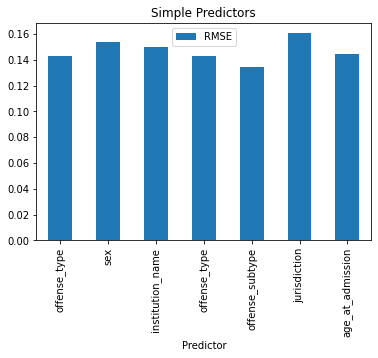

In [0]:
df_simple_reg = pd.DataFrame(simple_reg_models)
df_simple_reg.plot.bar(x="Predictor", y="RMSE")
plt.title("Simple Predictors")

In [0]:
print("Simple Regression Model With the Lowest RMSE: \n")
index = df_simple_reg['RMSE'].idxmin()
print(df_simple_reg['Predictor'][index], ": ", df_simple_reg['RMSE'][index])

Simple Regression Model With the Lowest RMSE: 

offense_subtype :  0.13446394204977405


In [0]:
best_single_reg_model = df_simple_reg['Model'][index]

In [0]:
# try simple KNearest for all types 


simple_knn_models = {"Predictor":[],
                     'K':[],
                     "RMSE":[],
                     "Model":[]}

X_cat = ['offense_type', 'sex', 'institution_name', 'offense_type', 
          'offense_subtype', 'jurisdiction', 'release_month']
X_quant = ['age_at_admission']

y_train = df['time served']


def make_cat_model(x, y_train):

  
  X_train = df[[x]]

  ct = make_column_transformer(
      (OneHotEncoder(handle_unknown="ignore"), [x]),
      remainder="passthrough"
  )

  test = {"Predictor":[],
          'K':[],
          "RMSE":[],
          "Model":[]}
  for i in range(5, 51):

    pipeline = make_pipeline(
        ct,
        KNeighborsRegressor(n_neighbors=i)
    )

    pipeline.fit(X_train, y_train)

    rmse = (-cross_val_score(pipeline,
                          X=X_train,
                          y=y_train,
                          cv=10,
                          scoring="neg_mean_squared_error"
    ).mean())**.5
    test["Predictor"].append(x)
    test["K"].append(i)
    test["RMSE"].append(rmse)
    test["Model"].append(pipeline)

  df_test = pd.DataFrame(test)
  smallest_error = df_test['RMSE'].idxmin()


  simple_knn_models['Predictor'].append(x)
  simple_knn_models['K'].append(df_test["K"][smallest_error])
  simple_knn_models['RMSE'].append(df_test["RMSE"][smallest_error])
  simple_knn_models['Model'].append(df_test["Model"][smallest_error])



def make_quant_model(x, y_train):
  
  X_train = df[[x]]

  ct = make_column_transformer(
      (StandardScaler(), [x]),
      remainder="passthrough"
  )

  test = {"Predictor":[],
          'K':[],
          "RMSE":[],
          "Model":[]}
  for i in range(5, 51):

    pipeline = make_pipeline(
        ct,
        KNeighborsRegressor(n_neighbors=i)
    )

    pipeline.fit(X_train, y_train)

    rmse = (-cross_val_score(pipeline,
                          X=X_train,
                          y=y_train,
                          cv=10,
                          scoring="neg_mean_squared_error"
    ).mean())**.5
    test["Predictor"].append(x)
    test["K"].append(i)
    test["RMSE"].append(rmse)
    test["Model"].append(pipeline)

  df_test = pd.DataFrame(test)
  smallest_error = df_test['RMSE'].idxmin()


  simple_knn_models['Predictor'].append(x)
  simple_knn_models['K'].append(df_test["K"][smallest_error])
  simple_knn_models['RMSE'].append(df_test["RMSE"][smallest_error])
  simple_knn_models['Model'].append(df_test["Model"][smallest_error])

  

for i in X_cat:
  make_cat_model(i, y_train)
for i in X_quant:
  make_quant_model(i, y_train)


  

Text(0.5, 1.0, 'Most Optimal Simple KNN Model ')

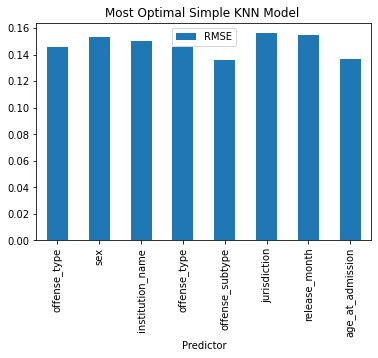

In [0]:
df_knn_simp = pd.DataFrame(simple_knn_models)
df_knn_simp.plot.bar("Predictor", "RMSE")
plt.title("Most Optimal Simple KNN Model ")

In [0]:
df_knn_simp

,Predictor,K,RMSE,Model
0,offense_type,49,0.145795,"(ColumnTransformer(n_jobs=None, remainder='pas..."
1,sex,41,0.153356,"(ColumnTransformer(n_jobs=None, remainder='pas..."
2,institution_name,35,0.150334,"(ColumnTransformer(n_jobs=None, remainder='pas..."
3,offense_type,49,0.145795,"(ColumnTransformer(n_jobs=None, remainder='pas..."
4,offense_subtype,15,0.136028,"(ColumnTransformer(n_jobs=None, remainder='pas..."
5,jurisdiction,50,0.156120,"(ColumnTransformer(n_jobs=None, remainder='pas..."
6,release_month,49,0.155040,"(ColumnTransformer(n_jobs=None, remainder='pas..."
7,age_at_admission,35,0.136801,"(ColumnTransformer(n_jobs=None, remainder='pas..."


In [0]:
print("Simple KNN Model With the Lowest RMSEn: \n")
index = df_knn_simp['RMSE'].idxmin()
print(df_knn_simp['K'][index], "          : ", df_knn_simp['RMSE'][index])
print("Predictors   : ", df_knn_simp['Predictor'][index])

Simple KNN Model With the Lowest RMSEn: 

15           :  0.13602826853016461
Predictors   :  offense_subtype


In [0]:
best_simple_knn_model = df_knn_simp['Model'][index]

In [0]:
# all quant

# quant_knearest_models = pd.Series(index=range(5,51))
quant_knearest_models = {"K Neighbors":[],
                         "RMSE":[],
                         "Model":[]}

X_vars = ['age_at_admission']
X_train = df[X_vars]

ct = make_column_transformer(
    (StandardScaler(), ['age_at_admission']),
    remainder="drop"
)


for i in range(5, 51):

  pipeline = make_pipeline(
      ct, 
      KNeighborsRegressor(n_neighbors=i)
  )

  pipeline.fit(X_train, y_train)



  rmse = (-cross_val_score(pipeline,
                          X=X_train,
                          y=y_train,
                          cv=10,
                          scoring="neg_mean_squared_error"
  ).mean())**.5
                           
                                
  quant_knearest_models["K Neighbors"].append(i)
  quant_knearest_models["RMSE"].append(rmse)
  quant_knearest_models['Model'].append(pipeline)


Text(0.5, 1.0, 'Quantitative Predictors')

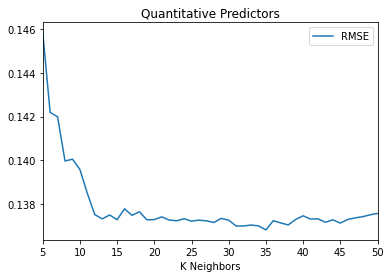

In [0]:
df_kn_quant = pd.DataFrame(quant_knearest_models)
df_kn_quant.plot.line("K Neighbors", "RMSE")
plt.title("Quantitative Predictors")


In [0]:
print("Quantitative KNN Model With the Lowest RMSE: \n")
index = df_kn_quant['RMSE'].idxmin()
print(df_kn_quant['K Neighbors'][index], "          : ", df_kn_quant['RMSE'][index])
print("Predictors   : ", X_vars[0])

Quantitative KNN Model With the Lowest RMSE: 

35           :  0.13680062123469927
Predictors   :  age_at_admission


In [0]:
best_quant_knn_model = df_kn_quant['Model'][index]

In [0]:
# categorical 
cat_knearest_models = {"K Neighbors":[],
                       "RMSE":[],
                       "Model":[]}

X_train = df[['offense_type', 'sex', 'institution_name', 'offense_type', 
          'offense_subtype', 'jurisdiction']]# 'release_month']]

ct = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['offense_type', 'sex', 'institution_name', 'offense_type', 
                       'offense_subtype', 'jurisdiction']),
    remainder="drop"
)


for i in range(5, 51):

  pipeline = make_pipeline(
      ct, 
      KNeighborsRegressor(n_neighbors=i)
  )

  pipeline.fit(X_train, y_train)

  rmse = (-cross_val_score(pipeline,
                          X=X_train,
                          y=y_train,
                          cv=10,
                          scoring="neg_mean_squared_error"
  ).mean())**.5

  cat_knearest_models["K Neighbors"].append(i)
  cat_knearest_models["RMSE"].append(rmse)
  cat_knearest_models["Model"].append(pipeline)



Text(0.5, 1.0, 'Categorical Predictors')

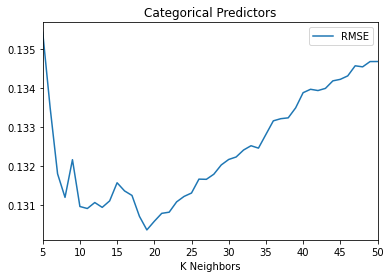

In [0]:
df_kn_cat = pd.DataFrame(cat_knearest_models)
df_kn_cat.plot.line("K Neighbors", "RMSE")
plt.title("Categorical Predictors")

In [0]:
print("Categorical KNN Model With the Lowest RMSE: \n")
index = df_kn_cat['RMSE'].idxmin()
print(df_kn_cat['K Neighbors'][index], "        : ", df_kn_cat['RMSE'][index])
print("Predictors : ",'offense type,', 'sex,', 'institution name,', 'offense type,', 
          'offense subtype,', 'jurisdiction,', 'release month')

Categorical KNN Model With the Lowest RMSE: 

19         :  0.13037244516306787
Predictors :  offense type, sex, institution name, offense type, offense subtype, jurisdiction, release month


In [0]:
best_cat_knn_model = df_kn_cat['Model'][index]

In [0]:
# both 

knearest_models = {"K Neighbors":[],
                   "RMSE":[],
                   "Model":[]}

X_train_cat = ['offense_type', 'sex', 'institution_name', 'offense_subtype', 'jurisdiction']
X_train_quant = ['age_at_admission']
X_train = df[X_train_cat + X_train_quant].copy()

ct = make_column_transformer(
    (StandardScaler(), X_train_quant),
    (OneHotEncoder(handle_unknown='ignore'), X_train_cat),
    remainder="drop"
)


for i in range(5, 51):

  pipeline = make_pipeline(
      ct, 
      KNeighborsRegressor(n_neighbors=i)
  )

  pipeline.fit(X_train, y_train)

  rmse = (-cross_val_score(pipeline,
                          X=X_train,
                          y=y_train,
                          cv=10,
                          scoring="neg_mean_squared_error"
  ).mean())**.5

  knearest_models["K Neighbors"].append(i)
  knearest_models["RMSE"].append(rmse)
  knearest_models["Model"].append(pipeline)



Text(0.5, 1.0, 'Mixed Predictors')

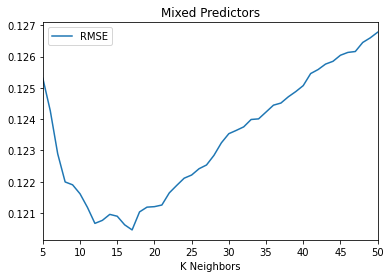

In [0]:
df_kn = pd.DataFrame(knearest_models)
df_kn.plot.line("K Neighbors", "RMSE")
plt.title("Mixed Predictors")

In [0]:
print("Mixed KNN Model With the Lowest RMSE: \n")
index = df_kn['RMSE'].idxmin()
print(df_kn['K Neighbors'][index], "        : ", df_kn['RMSE'][index])
print("Predictors : ",'offense type,', 'sex,', 'institution name,', 'offense type,', 
          'offense subtype,', 'jurisdiction,\n', '\t\tage at admission') 

Mixed KNN Model With the Lowest RMSE: 

17         :  0.12045619584765109
Predictors :  offense type, sex, institution name, offense type, offense subtype, jurisdiction,
 		age at admission


In [0]:
best_mixed_knn_model = df_kn['Model'][index]